# Lesson 0: The Basics

## The Goal: quantify the significance of an observed excess <b>or</b> signal strength to exclude given an observation

Starting simple:

Let's start with two values from a thought experiment, $x \pm \sigma_{x}$ and $y \pm \sigma_{y}$. We will make an assumption here that $\sigma_{x}$ and $\sigma_{y}$ are Gaussian distributed and totally uncorrelated.

Q: How different are these numbers, statistically?

We can quantify this by looking at $ (x-y) / \sigma_{x-y}$ (how many "sigma" are the values separated by). Using standard uncertainty propagation, this is simply:

\begin{align}
n_{\sigma} = \frac{x-y}{\sqrt{\sigma_x^2 + \sigma_y^2}}\\
\end{align}

But what is the probability the two values being incompatible, given a separation of  $n_\sigma$?



In [1]:
import ROOT
import numpy as np
from scipy.stats import norm

Welcome to JupyROOT 6.18/00


In [5]:
colours = [ROOT.kRed+2,ROOT.kOrange-3, ROOT.kGreen+2,ROOT.kBlue-3,ROOT.kViolet-3,ROOT.kMagenta+2]

intervals = [0,1,2,3,4,5]
gaussian_dists = [ROOT.TH1D("gaussian_"+str(sval),"gaussian distributions",100,-5,5) for sval in intervals]

rnd = ROOT.TRandom(123)

n_toys = 200000
gaus_sigma = 1
i=0

while i < n_toys:
    rnd_number = rnd.Gaus(0,gaus_sigma) - 0

    for iv,gd in zip(intervals,gaussian_dists):
    
        if np.abs(rnd_number) >= iv*gaus_sigma:
            gd.Fill(rnd_number)
    i+=1
for iv,col,gd in zip(intervals,colours,gaussian_dists):
    gd.Scale(1./n_toys)
    gd.SetLineColor(ROOT.kBlack)
    gd.SetFillColor(col)
    gd.SetLineWidth(1)

Warning in <TROOT::Append>: Replacing existing TH1: gaussian_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: gaussian_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: gaussian_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: gaussian_3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: gaussian_4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: gaussian_5 (Potential memory leak).


From our toys, probability of being within  0 sigmal is:  0.0 %
        calculated from scipy:  0.0 %
From our toys, probability of being within  1 sigmal is:  68.1105 %
        calculated from scipy:  68.26894921370858 %
From our toys, probability of being within  2 sigmal is:  95.4685 %
        calculated from scipy:  95.44997361036415 %
From our toys, probability of being within  3 sigmal is:  99.7175 %
        calculated from scipy:  99.73002039367398 %
From our toys, probability of being within  4 sigmal is:  99.994 %
        calculated from scipy:  99.99366575163337 %
From our toys, probability of being within  5 sigmal is:  100.0 %
        calculated from scipy:  99.99994266968561 %


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


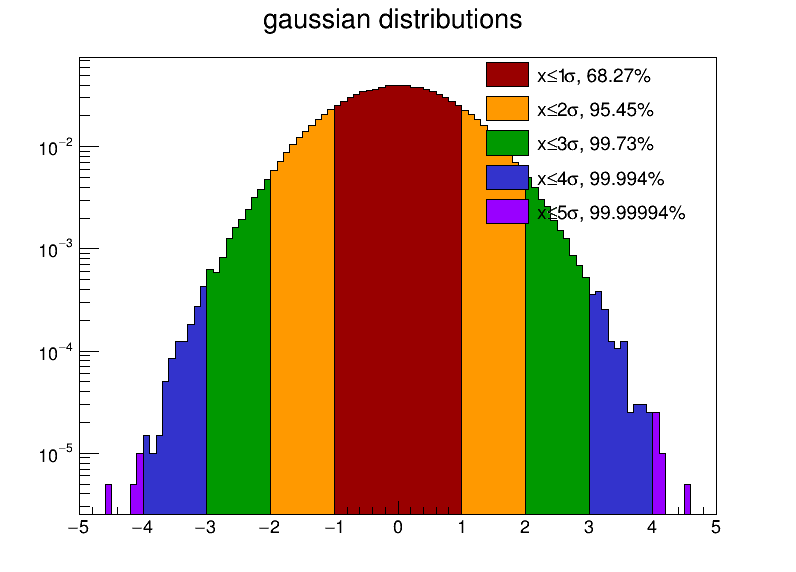

In [6]:
c1 = ROOT.TCanvas("c1","c1",800,600)

for iv,col,gd in zip(intervals,colours,gaussian_dists):
    print 'From our toys, probability of being within ',iv,'sigmal is: ',(1-gd.Integral())*100,'%'
    print '        calculated from scipy: ',2.*(norm.cdf(gaus_sigma*iv,0,gaus_sigma) - 0.5)*100.,'%'

leg= ROOT.TLegend(0.6,0.6,0.9,0.9)
leg.SetBorderSize(0); leg.SetFillStyle(0)

ROOT.gStyle.SetOptStat(0)
pct = [68.27,95.45,99.73,99.994,99.99994]
for i,(pct,iv,pd) in enumerate(zip(pct,intervals,gaussian_dists)):
    if i==0: pd.Draw("hist")
    else: pd.Draw("hist same")
    leg.AddEntry(pd,"x#leq"+str(iv+1)+"#sigma, "+str(pct)+"%","f")
leg.Draw()
c1.SetLogy(1) #show the tails by changing this to 1!
c1.Draw()

In [4]:
100./.00005

2000000.0

The use of toys to fill a histogram, rather than explicit calculations, is what gives different probabilities between scipy and the integral of our histogram.

How many toys would we need to generate to populate the 4-5 $\sigma$ bin?

Now, recall, what we wanted to do was calculate the *probability* of our two values being in agreement, given that they are $n_{\sigma}$ apart. For this, we can flip the calculation around. 

Let's calculate this for $20 \pm 8$ and $50 \pm 18$. Naively, one might think these numbers are quite different.

However, we have $n_{\sigma} = 30 / \sqrt{8^2 + 18^2} = 1.52 \sigma$

In [7]:
print 'Probability integrated from our histogram: ',(1. - 2.*(gaussian_dists[0].Integral(gaussian_dists[0].FindBin(1.52),gaussian_dists[0].GetNbinsX())))*100.,'%'
print 'Probability calculated from scipy: ',(1. - 2.*(1-norm.cdf(1.52)))*100.,'%'

Probability integrated from our histogram:  86.562 %
Probability calculated from scipy:  87.14890243621282 %


The values aren't quite the same because the bin values are coarser than 0.02, so we don't exactly integrate $1.52\sigma$. But, in both cases we find that there is an 87% chance that these values are compatible, or, only a 13% chance that they are incompatible.

This probability of incompatibility is our $p$-value.

The $p$-value is more properly defined as "the probability that the process would produce a measurement this far, or further, from the ideal mean".

In our case, it turns out that probability was quite high!

One important thing to note is that we have calculated a *two-sided* $p$-value: i.e., we integrated both sides of the Gaussian. It's ok here, because we asked the question "how likely is it that my two numbers were this far apart". If instead we wanted to know a probability that one value was X sigma or more *larger* than some other number, then we would need a *one-sided* $p$-value.

Let's extend this to more practical terms in Lesson 1: The Poisson Distribution